In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def four_bit_patern():
    imgList = []
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    imgList.append(np.array([i,j,k,l]))
    return imgList

In [4]:
def four_permutation_matrix():
    arr = np.eye(4, dtype='int')
    arrDict = {}
    count = 0

    for i in range(4):
        arr[0][np.where(arr[0] == 1)], arr[0][i] = arr[0][i], arr[0][np.where(arr[0] == 1)]
        for j in range(4):
            if j != i:
                arr[1][np.where(arr[1] == 1)], arr[1][j] = arr[1][j], arr[1][np.where(arr[1] == 1)]
                for h in range(4):
                    if h != i and h != j:
                        arr[2][np.where(arr[2] == 1)], arr[2][h] = arr[2][h], arr[2][np.where(arr[2] == 1)]
                        for k in range(4):
                            if k != i and k != j and k != h:
                                arr[3][np.where(arr[3] == 1)], arr[3][k] = arr[3][k], arr[3][np.where(arr[3] == 1)]
                                arrDict[count] = arr.tolist()
                                count += 1

    for i in range(24):
        arrDict[i] = np.array(arrDict[i])
        
    return arrDict

In [11]:
def plt_four_permutation():
    plt.figure()
    arrDict = four_permutation_matrix()

    for k, v in arrDict.items():
        plt.subplot(4,6,k+1)
        plt.imshow(v)
        plt.axis("off")
        plt.title(k)
        
    return plt.subplots_adjust(0,0,1,1, wspace=0.1, hspace=0.5)

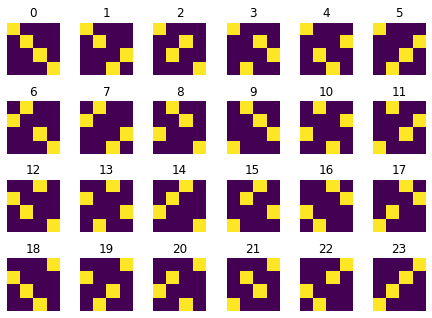

In [12]:
plt_four_permutation()

In [13]:
def order0():
    orderMatrix = []
    orderList = []
    orderPool = []
    imgList = four_bit_patern()
    arrDict = four_permutation_matrix()

    for i in range(16):
        for j in range(16):
            for k, v in arrDict.items():
                if np.allclose(np.dot(v, imgList[i]), imgList[j]):
                    orderPool.append(k)
            orderList.append(tuple(orderPool))
            orderPool = []
        orderMatrix.append(orderList)
        orderList = []

    order0 = np.array(orderMatrix)
    return order0

In [15]:
def plt_order0():
    orderMatrix = []
    orderList = []
    orderPool = []
    imgList = four_bit_patern()
    arrDict = four_permutation_matrix()

    for i in range(16):
        for j in range(16):
            for k, v in arrDict.items():
                if np.allclose(np.dot(v, imgList[i]), imgList[j]):
                    orderPool.append(k)
            orderList.append(len(orderPool))
            orderPool = []
        orderMatrix.append(orderList)
        orderList = []

    order0 = np.array(orderMatrix)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(order0)
    fig.colorbar(im)
    
    return

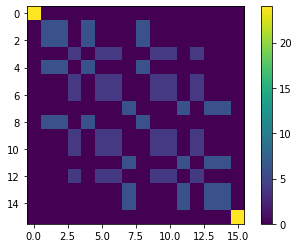

In [16]:
plt_order0()

In [17]:
def order1():
    orderMatrix = []
    orderList = []
    order = order0()

    for i in range(16):
        for j in range(16):
            orderList.append((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j])))
        orderMatrix.append(orderList)
        orderList = []
    
    order1 = np.array(orderMatrix)
    return order1

In [24]:
def plt_order1():
    orderMatrix = []
    orderList = []
    order = order0()

    for i in range(16):
        for j in range(16):
            orderList.append(len((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j]))))
        orderMatrix.append(orderList)
        orderList = []
    
    order1 = np.array(orderMatrix)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(order1)
    fig.colorbar(im)
    
    return 

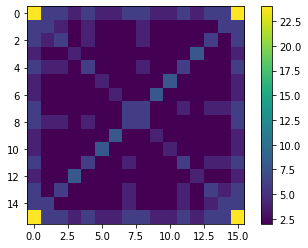

In [25]:
plt_order1()

In [26]:
def order2():
    orderMatrix = []
    orderList = []
    imgList = four_bit_patern()
    order = order0()
    
    for i in range(16):
        for j in range(16):
            if np.allclose(imgList[i]+imgList[j],np.array([1,1,1,1])):
                orderList.append((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j])) | set('R'))        
            else:
                orderList.append((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j])))
        orderMatrix.append(orderList)
        orderList = []
    
    order2 = np.array(orderMatrix)
    return order2

In [27]:
def plt_order2():
    orderMatrix = []
    orderList = []
    imgList = four_bit_patern()
    order = order0()
    
    for i in range(16):
        for j in range(16):
            if np.allclose(imgList[i]+imgList[j],np.array([1,1,1,1])):
                orderList.append(len((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j])) | set('R')))        
            else:
                orderList.append(len((set(order[i][j]) & set(order[j][i])) | (set(order[i][i]) & set(order[j][j]))))
        orderMatrix.append(orderList)
        orderList = []
    
    order2 = np.array(orderMatrix)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(order2)
    fig.colorbar(im)
    
    return

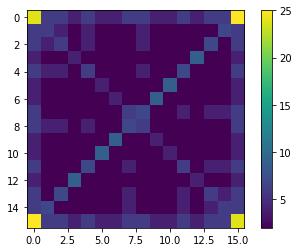

In [29]:
plt_order2()